In [1]:
import pandas as pd
import geopandas as gpd
import geofeather

In [2]:
acs_tracts_raw = pd.read_feather('../data/raw/acs-2018-nyc-tracts.feather')

In [3]:
acs_tracts_raw.head()

,GEOID,NAME,gross_rent_medE,gross_rent_medM,hh_inc_medE,hh_inc_medM,rent_burden_medE,rent_burden_medM,pov_pctE,pov_pctM,hh_size_avgE,hh_size_avgM,occ_unitsE,occ_unitsM,occ_renter_unitsE,occ_renter_unitsM,vac_forrent_unitsE,vac_forrent_unitsM,vac_rented_unitsE,vac_rented_unitsM
0,36061003700,"Census Tract 37, New York County, New York",2547.0,219.0,153281.0,24536.0,23.9,4.0,2527.0,293.0,1.87,0.15,1353.0,125.0,789.0,130.0,25.0,40.0,9.0,14.0
1,36061008601,"Census Tract 86.01, New York County, New York",3501.0,NaN,150962.0,36467.0,27.7,7.7,3022.0,321.0,2.27,0.21,1332.0,114.0,1001.0,117.0,48.0,53.0,0.0,12.0
2,36061004400,"Census Tract 44, New York County, New York",2293.0,177.0,101736.0,6310.0,28.2,5.1,16684.0,1002.0,2.05,0.13,8145.0,323.0,8145.0,323.0,122.0,194.0,153.0,191.0
3,36061008603,"Census Tract 86.03, New York County, New York",3047.0,255.0,168245.0,35620.0,26.2,12.3,4313.0,592.0,1.76,0.15,2457.0,230.0,736.0,148.0,111.0,100.0,56.0,72.0
4,36061008602,"Census Tract 86.02, New York County, New York",NaN,NaN,NaN,NaN,NaN,NaN,0.0,12.0,NaN,NaN,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0


In [4]:
nyc_tracts = gpd.read_file('../data/raw/nyct2010.shp')

In [5]:
nyc_tracts.head()

,CTLabel,BoroCode,BoroName,CT2010,BoroCT2010,CDEligibil,NTACode,NTAName,PUMA,Shape_Leng,Shape_Area,geometry
0,9,5,Staten Island,000900,5000900,E,SI22,West New Brighton-New Brighton-St. George,3903,7729.016794,2.497010e+06,"POLYGON ((962269.126 173705.500, 962288.722 17..."
1,98,1,Manhattan,009800,1009800,I,MN19,Turtle Bay-East Midtown,3808,5534.199811,1.906016e+06,"POLYGON ((994133.507 214848.898, 994005.909 21..."
2,100,1,Manhattan,010000,1010000,I,MN19,Turtle Bay-East Midtown,3808,5692.168737,1.860938e+06,"POLYGON ((993108.306 216013.131, 992982.220 21..."
3,102,1,Manhattan,010200,1010200,I,MN17,Midtown-Midtown South,3807,5687.802439,1.860993e+06,"POLYGON ((992216.539 216507.687, 992091.031 21..."
4,104,1,Manhattan,010400,1010400,I,MN17,Midtown-Midtown South,3807,5693.036367,1.864600e+06,"POLYGON ((991325.882 217001.689, 991199.221 21..."


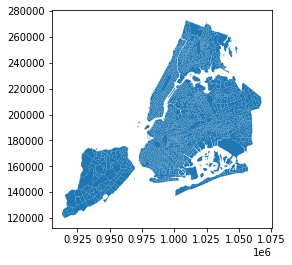

In [6]:
nyc_tracts.plot()

In [7]:
acs_tracts_geo = (
    nyc_tracts
    .assign(
        county = lambda df : df.BoroCode.str.replace('1', '061').replace('2', '005').replace('3', '047').replace('4', '081').replace('5', '085'),
        geoid =  lambda df : '36' + df.county + df.CT2010
    )
    .set_index('geoid')
    .join(acs_tracts_raw.set_index('GEOID'))
    .sort_values(by=['geoid'])
    .reset_index()
)

In [8]:
acs_tracts_geo.head()

,geoid,CTLabel,BoroCode,BoroName,CT2010,BoroCT2010,CDEligibil,NTACode,NTAName,PUMA,...,hh_size_avgE,hh_size_avgM,occ_unitsE,occ_unitsM,occ_renter_unitsE,occ_renter_unitsM,vac_forrent_unitsE,vac_forrent_unitsM,vac_rented_unitsE,vac_rented_unitsM
0,36005000100,1,2,Bronx,000100,2000100,I,BX98,Rikers Island,3710,...,NaN,NaN,0.0,17.0,0.0,17.0,0.0,17.0,0.0,17.0
1,36005000200,2,2,Bronx,000200,2000200,I,BX09,Soundview-Castle Hill-Clason Point-Harding Park,3709,...,3.42,0.40,1328.0,84.0,631.0,138.0,15.0,23.0,0.0,12.0
2,36005000400,4,2,Bronx,000400,2000400,I,BX09,Soundview-Castle Hill-Clason Point-Harding Park,3709,...,2.86,0.25,1963.0,96.0,464.0,135.0,87.0,71.0,0.0,17.0
3,36005001600,16,2,Bronx,001600,2001600,E,BX09,Soundview-Castle Hill-Clason Point-Harding Park,3709,...,2.86,0.19,1982.0,91.0,1699.0,104.0,23.0,37.0,43.0,47.0
4,36005001900,19,2,Bronx,001900,2001900,I,BX39,Mott Haven-Port Morris,3710,...,2.43,0.21,929.0,57.0,831.0,69.0,21.0,23.0,0.0,12.0


In [9]:
geofeather.to_geofeather(acs_tracts_geo, '../data/clean/acs_tracts_geo.feather')